In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Sébastien
local_path = "UTKFace"
zip_name = local_path + ".zip"
drive_zip_path = '/content/drive/MyDrive/ISEP/A3/Machine_Learning/Face_Reader' + '/' + zip_name

In [ ]:
# Pablo
local_path = "UTKFace"
zip_name = local_path + ".zip"
drive_zip_path = '/content/drive/MyDrive/Face_Reader' + '/' + zip_name

In [ ]:
# Pierre
local_path = "UTKFace"
zip_name = local_path + ".zip"
drive_zip_path = '/content/drive/MyDrive/Ingénieur\ -\ ISEP/A3/Face_Reader' + '/' + zip_name

In [ ]:
# Mathieu
local_path = "UTKFace"
zip_name = local_path + ".zip"
drive_zip_path = '/content/drive/MyDrive/Face_Reader' + '/' + zip_name

In [ ]:
!cp {drive_zip_path} .
!unzip -q {zip_name}
!rm {zip_name}

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, Input
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [ ]:
image_size = (80, 80)
input_shape = (image_size[0], image_size[1], 3)
test_proportion = 0.25
random_fix=42

In [ ]:
def load_image(path, target_size):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image.astype(np.float32) / 255
    return image

def build_dataset(folder, target_size):
    images = []
    labels = []
    for file in os.listdir(folder):
        if (os.path.splitext(file)[1] == ".jpg"):
            fileParts = file.split("_", 2)
            labels.append([ int(fileParts[0]), int(fileParts[1]) ])
            image = load_image(os.path.join(folder, file), target_size)
            images.append(image)
    return np.array(images), np.array(labels)

images, labels = build_dataset(local_path, image_size)
print("Successfully loaded {} images.".format(len(images)))

Successfully loaded 23708 images.


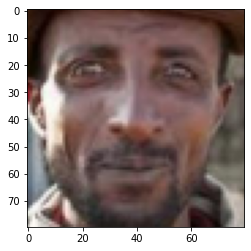

In [ ]:
plt.imshow(images[152])

In [ ]:
print(labels)

[[24  1]
 [26  1]
 [26  0]
 ...
 [32  1]
 [ 4  0]
 [27  0]]


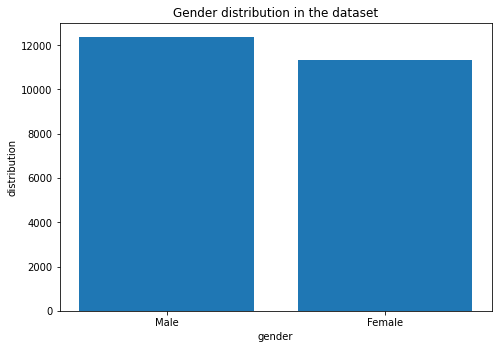

In [ ]:
values, counts = np.unique(labels[:, 1], return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[counts[0] ,counts[1]]
plt.ylabel('distribution')
plt.xlabel('gender')
plt.title('Gender distribution in the dataset')
ax.bar(gender,values)
plt.show()

In [ ]:
values, counts = np.unique(labels[:, 0], return_counts=True)

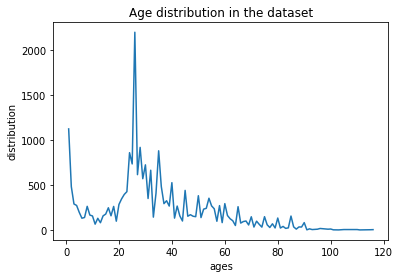

In [ ]:
plt.plot(values, counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.title('Age distribution in the dataset')
plt.show()

In [ ]:
X_train, X_tmp_validation, Y_train, Y_tmp_validation = train_test_split(images, labels, 
                                                    test_size=test_proportion,
                                                    random_state=random_fix)

X_validation, X_test, Y_validation, Y_test = train_test_split(X_tmp_validation, Y_tmp_validation, 
                                                    test_size=0.3,
                                                    random_state=random_fix)

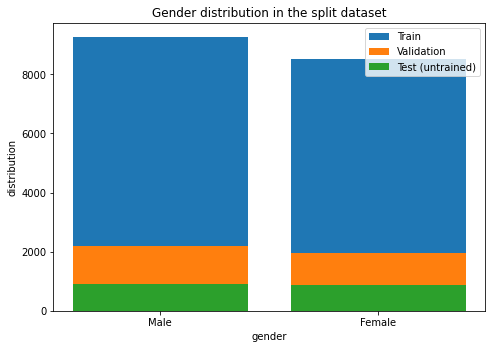

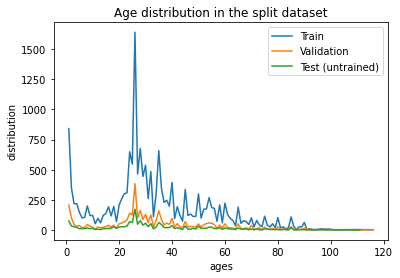

In [ ]:
values_train, counts_train = np.unique(Y_train[:, 1], return_counts=True)
values_validation, counts_validation = np.unique(Y_validation[:, 1], return_counts=True)
values_test, counts_test = np.unique(Y_test[:, 1], return_counts=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
ax.bar(gender,[counts_train[0] ,counts_train[1]])
ax.bar(gender,[counts_validation[0], counts_validation[1]])
ax.bar(gender,[counts_test[0] ,counts_test[1]])
plt.ylabel('distribution')
plt.xlabel('gender')
plt.legend(['Train', 'Validation', 'Test (untrained)'], loc='best')
plt.title('Gender distribution in the split dataset')
plt.show()

values_train, counts_train = np.unique(Y_train[:, 0], return_counts=True)
values_validation, counts_validation = np.unique(Y_validation[:, 0], return_counts=True)
values_test, counts_test = np.unique(Y_test[:, 0], return_counts=True)
plt.plot(values_train, counts_train)
plt.plot(values_validation, counts_validation)
plt.plot(values_test, counts_test)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.legend(['Train', 'Validation', 'Test (untrained)'], loc='best')
plt.title('Age distribution in the split dataset')
plt.show()

In [ ]:
# Augmenting dataset 
data_generator = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

data_generator.fit(X_train)


In [ ]:
def build_model(input_shape):

    inputs = Input(input_shape)

    # conv1 = Conv2D(filters=32, kernel_size=(7, 7), padding="same", activation="relu", name="Conv_1")(inputs)
    # maxp1 = MaxPool2D(pool_size=(2,2), name="MaxPool_1")(conv1)

    # conv2 = Conv2D(filters=48, kernel_size=(5, 5), padding="same", activation="relu", name="Conv_2")(maxp1)
    # maxp2 = MaxPool2D(pool_size=(2,2), name="MaxPool_2")(conv2)

    # conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_3")(maxp2)
    # maxp3 = MaxPool2D(pool_size=(2,2), name="MaxPool_3")(conv3)

    conv1 = Conv2D(filters=32, kernel_size=(7, 7), padding="same", activation="relu", name="Conv_1")(inputs)

    conv2 = Conv2D(filters=48, kernel_size=(5, 5), padding="same", activation="relu", name="Conv_2")(conv1)

    conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_3")(conv2)
    maxp = MaxPool2D(pool_size=(8,8), name="MaxPool")(conv3)

    flatten = Flatten(name="Flatten")(maxp)
    dense1 = Dense(64, activation="relu", name="Age_Dense")(flatten)
    dense2 = Dense(8, activation="relu", name="Sex_Dense")(flatten)
    
    out1 = Dense(1, activation="relu", name="Age_output")(dense1)
    out2 = Dense(1, activation="sigmoid", name="Sex_output")(dense2)

    model = Model(inputs=[inputs], outputs=[out1, out2], name="Model")

    # Adam 3e-4 ?
    optimizer = Adam(learning_rate=0.0003)

    model.compile(
        loss=["mean_absolute_error", "binary_crossentropy"],
        loss_weights=[0.1, 1],
        optimizer=optimizer, 
        metrics=[["mean_absolute_error"], ["binary_accuracy"]])

    return model

model = build_model(input_shape=input_shape)
model.summary()

Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
Conv_1 (Conv2D)                 (None, 80, 80, 32)   4736        input_2[0][0]                    
__________________________________________________________________________________________________
Conv_2 (Conv2D)                 (None, 80, 80, 48)   38448       Conv_1[0][0]                     
__________________________________________________________________________________________________
Conv_3 (Conv2D)                 (None, 80, 80, 64)   27712       Conv_2[0][0]                     
______________________________________________________________________________________________

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=0,
    mode='min', baseline=None, restore_best_weights=True
)

history = model.fit(X_train, [Y_train[:, 0], Y_train[:, 1]], batch_size=64, 
            validation_data=(X_validation, [Y_validation[:, 0], Y_validation[:, 1]]), epochs=200,
            callbacks=[early_stop])

# history = model.fit(X_train, [Y_train[:, 0], Y_train[:, 1]], batch_size=64, 
#             validation_data=(X_validation, [Y_validation[:, 0], Y_validation[:, 1]]), epochs=200,
#             callbacks=[early_stop])

# model.save("./model/face-reader.h5")

Epoch 1/200
278/278 [==============================] - 16s 53ms/step - loss: 2.5072 - Age_output_loss: 18.4760 - Sex_output_loss: 0.6596 - Age_output_mean_absolute_error: 18.4760 - Sex_output_binary_accuracy: 0.6256 - val_loss: 1.8773 - val_Age_output_loss: 13.2234 - val_Sex_output_loss: 0.5550 - val_Age_output_mean_absolute_error: 13.2234 - val_Sex_output_binary_accuracy: 0.7832
Epoch 2/200
278/278 [==============================] - 14s 51ms/step - loss: 1.7824 - Age_output_loss: 12.4702 - Sex_output_loss: 0.5353 - Age_output_mean_absolute_error: 12.4702 - Sex_output_binary_accuracy: 0.7874 - val_loss: 1.6088 - val_Age_output_loss: 11.2061 - val_Sex_output_loss: 0.4882 - val_Age_output_mean_absolute_error: 11.2061 - val_Sex_output_binary_accuracy: 0.8301
Epoch 3/200
278/278 [==============================] - 14s 52ms/step - loss: 1.5410 - Age_output_loss: 10.6843 - Sex_output_loss: 0.4726 - Age_output_mean_absolute_error: 10.6843 - Sex_output_binary_accuracy: 0.8354 - val_loss: 1.4963

In [ ]:
def print_metric(name, history):
    train_value=name
    test_value="val_" + name
    plt.plot(history.history[train_value])
    plt.plot(history.history[test_value])
    plt.title('Model %s' % (name))
    plt.ylabel(name)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

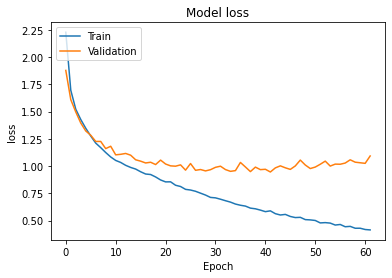

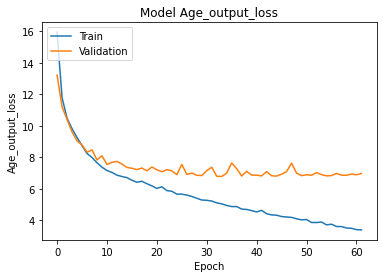

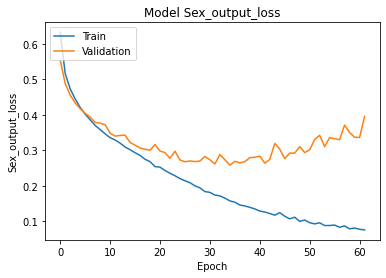

In [ ]:
print_metric("loss", history)
print_metric("Age_output_loss", history)
print_metric("Sex_output_loss", history)

In [ ]:
def build_model2(input_shape, learning_rate):

    inputs = Input(input_shape)

    conv1 = Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation="relu", name="Conv_1")(inputs)
    maxp1 = MaxPool2D(pool_size=(2,2), name="MaxPool_1")(conv1)

    conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_2")(maxp1)
    maxp2 = MaxPool2D(pool_size=(2,2), name="MaxPool_2")(conv2)

    conv3 = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_3")(maxp2)
    maxp3 = MaxPool2D(pool_size=(2,2), name="MaxPool_3")(conv3)

    conv4 = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_4")(maxp3)
    maxp4 = MaxPool2D(pool_size=(2,2), name="MaxPool_4")(conv4)

    flatten = Flatten(name="Flatten")(maxp4)
    dense1 = Dense(64, activation="relu", name="Age_Dense")(flatten)
    dense2 = Dense(8, activation="relu", name="Sex_Dense")(flatten)

    drop1=Dropout(0.1)(dense1)
    drop2=Dropout(0.1)(dense2)
    
    out1 = Dense(1, activation="relu", name="Age_output")(drop1)
    out2 = Dense(1, activation="sigmoid", name="Sex_output")(drop2)

    model = Model(inputs=[inputs], outputs=[out1, out2], name="Model")

    # Adam 3e-4 ?
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        loss=["mean_absolute_error", "binary_crossentropy"],
        loss_weights=[1, 1],
        optimizer=optimizer, 
        metrics=[["mean_absolute_error"], ["binary_accuracy"]])

    return model

model2 = build_model2(input_shape, 0.0003)
model2.summary()

Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
Conv_1 (Conv2D)                 (None, 80, 80, 32)   2432        input_11[0][0]                   
__________________________________________________________________________________________________
MaxPool_1 (MaxPooling2D)        (None, 40, 40, 32)   0           Conv_1[0][0]                     
__________________________________________________________________________________________________
Conv_2 (Conv2D)                 (None, 40, 40, 64)   18496       MaxPool_1[0][0]                  
______________________________________________________________________________________________

In [ ]:
early_stop2 = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=0,
    mode='min', baseline=None, restore_best_weights=True
)

history2 = model2.fit(X_train, [Y_train[:, 0], Y_train[:, 1]], batch_size=64, 
            validation_data=(X_validation, [Y_validation[:, 0], Y_validation[:, 1]]), epochs=200,
            steps_per_epoch=len(X_train) / 64,
            callbacks=[early_stop2])

Epoch 1/200
277/277 [==============================] - 6s 20ms/step - loss: 14.5997 - Age_output_loss: 14.0056 - Sex_output_loss: 0.5941 - Age_output_mean_absolute_error: 14.0056 - Sex_output_binary_accuracy: 0.6668 - val_loss: 13.2953 - val_Age_output_loss: 12.7566 - val_Sex_output_loss: 0.5387 - val_Age_output_mean_absolute_error: 12.7566 - val_Sex_output_binary_accuracy: 0.7305
Epoch 2/200
277/277 [==============================] - 6s 20ms/step - loss: 12.3454 - Age_output_loss: 11.8247 - Sex_output_loss: 0.5208 - Age_output_mean_absolute_error: 11.8247 - Sex_output_binary_accuracy: 0.7277 - val_loss: 10.9752 - val_Age_output_loss: 10.5054 - val_Sex_output_loss: 0.4698 - val_Age_output_mean_absolute_error: 10.5054 - val_Sex_output_binary_accuracy: 0.7751
Epoch 3/200
277/277 [==============================] - 5s 20ms/step - loss: 10.9311 - Age_output_loss: 10.4719 - Sex_output_loss: 0.4592 - Age_output_mean_absolute_error: 10.4719 - Sex_output_binary_accuracy: 0.7643 - val_loss: 11.2

In [ ]:
type(np.array([Y_train[:, 0], Y_train[:, 1]]))

numpy.ndarray

In [ ]:
model3.save("face-reader-model3.h5")

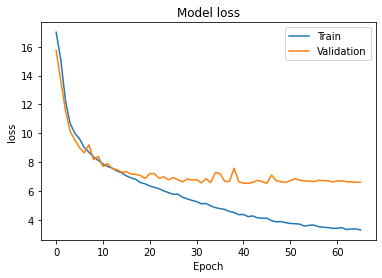

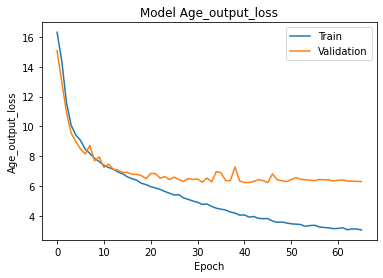

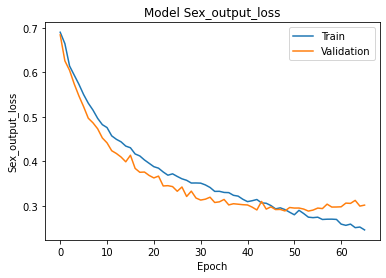

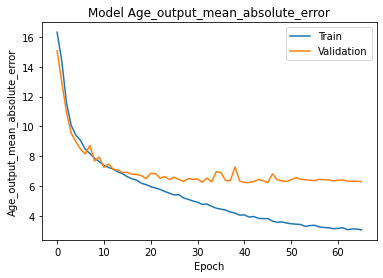

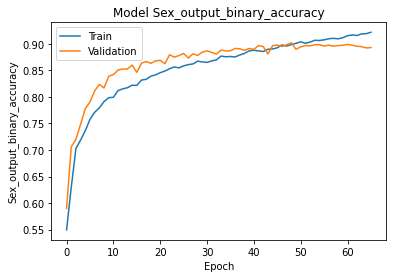

In [ ]:
print_metric("loss", history2)
print_metric("Age_output_loss", history2)
print_metric("Sex_output_loss", history2)
print_metric("Age_output_mean_absolute_error", history2)
print_metric("Sex_output_binary_accuracy", history2)

ValueError: ignored

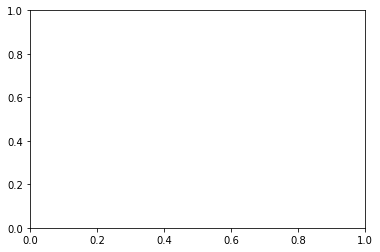

In [ ]:
pred=model2.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(Y_test[1], pred[1])
ax.plot([Y_test[1].min(),Y_test[1].max()], [Y_test[1].min(), Y_test[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [ ]:
def build_model3(input_shape, learning_rate, dropout_rate):

    inputs = Input(input_shape)

    conv1 = Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation="relu", name="Conv_1")(inputs)
    maxp1 = MaxPool2D(pool_size=(2,2), name="MaxPool_1")(conv1)
    drop1 = Dropout(dropout_rate, name="Dropout_1")(maxp1)

    conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_2")(drop1)
    maxp2 = MaxPool2D(pool_size=(2,2), name="MaxPool_2")(conv2)
    drop2 = Dropout(dropout_rate, name="Dropout_2")(maxp2)

    conv3 = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_3")(drop2)
    maxp3 = MaxPool2D(pool_size=(2,2), name="MaxPool_3")(conv3)
    drop3 = Dropout(dropout_rate, name="Dropout_3")(maxp3)

    conv4 = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_4")(drop3)
    maxp4 = MaxPool2D(pool_size=(2,2), name="MaxPool_4")(conv4)
    drop4 = Dropout(dropout_rate, name="Dropout_4")(maxp4)

    flatten = Flatten(name="Flatten")(drop4)

    dense_age = Dense(64, activation="relu", name="Age_Dense")(flatten)
    dense_sex = Dense(8, activation="sigmoid", name="Sex_Dense")(flatten)

    drop_dense_age = Dropout(dropout_rate, name="Dropout_Dense_age")(dense_age)
    drop_dense_sex = Dropout(dropout_rate, name="Dropout_Dense_sex")(dense_sex)
    
    out_age = Dense(1, activation="relu", name="Age_output")(drop_dense_age)
    out_sex = Dense(1, activation="sigmoid", name="Sex_output")(drop_dense_sex)

    model = Model(inputs=[inputs], outputs=[out_age, out_sex], name="Model")

    # Adam 3e-4 ?
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        loss=["mean_absolute_error", "binary_crossentropy"],
        loss_weights=[1, 1],
        optimizer=optimizer, 
        metrics=[["mean_absolute_error", "accuracy"], ["binary_accuracy"]])

    return model

model3 = build_model3(input_shape, 0.0001, 0.1)
model3.summary()

Model: "Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
Conv_1 (Conv2D)                 (None, 80, 80, 32)   2432        input_7[0][0]                    
__________________________________________________________________________________________________
MaxPool_1 (MaxPooling2D)        (None, 40, 40, 32)   0           Conv_1[0][0]                     
__________________________________________________________________________________________________
Dropout_1 (Dropout)             (None, 40, 40, 32)   0           MaxPool_1[0][0]                  
______________________________________________________________________________________________

In [ ]:
class CustomEarlyStopping(Callback):
    def __init__(self, patience=0):
        super(CustomEarlyStopping, self).__init__()
        self.patience = patience
        self.best_weights = None
        
    def on_train_begin(self, logs=None):
        # The number of epoch it has waited when loss is no longer minimum.
        self.wait = 0
        # The epoch the training stops at.
        self.stopped_epoch = 0
        self.best_epoch = 0
        # Initialize the best as infinity.
        self.best_feature1 = np.Inf
        self.best_feature2 = np.Inf

    def on_epoch_end(self, epoch, logs=None): 
        feature1=logs.get('val_Age_output_loss')
        feature2=logs.get('val_Sex_output_loss')

        # If BOTH the validation loss AND map10 does not improve for 'patience' epochs, stop training early.
        if np.less(feature1, self.best_feature1) and np.less(feature2, self.best_feature2):
            self.best_feature1 = feature1
            self.best_feature2 = feature2
            self.wait = 0
            # Record the best weights if current results is better (less).
            self.best_weights = self.model.get_weights()
            self.best_epoch = epoch
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch: %d" % (self.best_epoch + 1))
                self.model.set_weights(self.best_weights)
                
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %d: early stopping" % (self.stopped_epoch + 1))

early_stop3 = CustomEarlyStopping(patience=20)

history3 = model3.fit(X_train, [Y_train[:, 0], Y_train[:, 1]], batch_size=64, 
            validation_data=(X_validation, [Y_validation[:, 0], Y_validation[:, 1]]), epochs=200,
            steps_per_epoch=len(X_train) / 64,
            callbacks=[early_stop3])

Epoch 1/200
277/277 [==============================] - 7s 22ms/step - loss: 20.9897 - Age_output_loss: 20.3070 - Sex_output_loss: 0.6827 - Age_output_mean_absolute_error: 20.3070 - Age_output_accuracy: 0.0433 - Sex_output_binary_accuracy: 0.5639 - val_loss: 21.5410 - val_Age_output_loss: 20.8689 - val_Sex_output_loss: 0.6721 - val_Age_output_mean_absolute_error: 20.8689 - val_Age_output_accuracy: 0.0499 - val_Sex_output_binary_accuracy: 0.6032
Epoch 2/200
277/277 [==============================] - 6s 21ms/step - loss: 16.2465 - Age_output_loss: 15.5974 - Sex_output_loss: 0.6491 - Age_output_mean_absolute_error: 15.5974 - Age_output_accuracy: 0.0471 - Sex_output_binary_accuracy: 0.6301 - val_loss: 21.6985 - val_Age_output_loss: 21.0538 - val_Sex_output_loss: 0.6447 - val_Age_output_mean_absolute_error: 21.0538 - val_Age_output_accuracy: 0.0499 - val_Sex_output_binary_accuracy: 0.6618
Epoch 3/200
277/277 [==============================] - 6s 21ms/step - loss: 15.2211 - Age_output_loss: 1

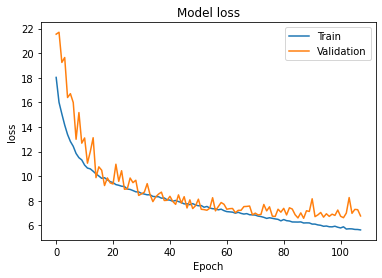

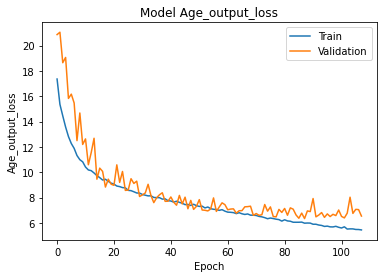

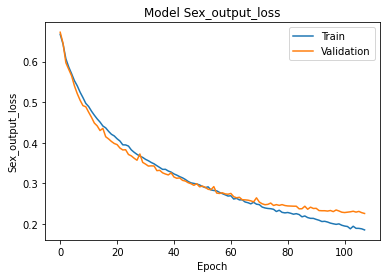

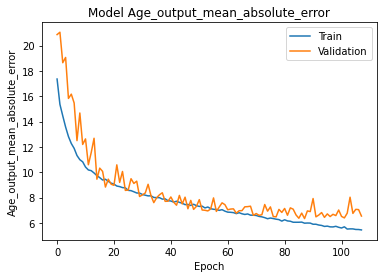

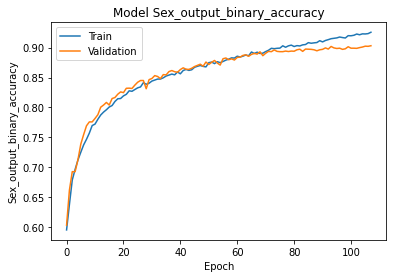

In [ ]:
print_metric("loss", history3)
print_metric("Age_output_loss", history3)
print_metric("Sex_output_loss", history3)
print_metric("Age_output_mean_absolute_error", history3)
print_metric("Sex_output_binary_accuracy", history3)

model3.save("face-reader-3.h5")

In [ ]:
def build_model4(input_shape, learning_rate):

    inputs = Input(input_shape)

    conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_1")(inputs)
    maxp1 = MaxPool2D(pool_size=(2,2), name="MaxPool_1")(conv1)
    drop1 = Dropout(0.1)(maxp1)

    conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_2")(drop1)
    maxp2 = MaxPool2D(pool_size=(2,2), name="MaxPool_2")(conv2)
    drop2 = Dropout(0.1)(maxp2)

    conv3 = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_3")(drop2)
    maxp3 = MaxPool2D(pool_size=(2,2), name="MaxPool_3")(conv3)
    drop3 = Dropout(0.1)(maxp3)

    conv4 = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_4")(drop3)
    maxp4 = MaxPool2D(pool_size=(2,2), name="MaxPool_4")(conv4)
    drop4 = Dropout(0.1)(maxp4)

    flatten = Flatten(name="Flatten")(maxp4)
    dense1 = Dense(64, activation="relu", name="Age_Dense")(flatten)
    drop5 = Dropout(0.1)(dense1)
    
    out1 = Dense(1, activation="relu", name="Age_output")(drop5)

    model = Model(inputs=[inputs], outputs=[out1], name="Model")

    # Adam 3e-4 ?
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        loss=["mean_absolute_error"],
        optimizer=optimizer, 
        metrics=["mean_absolute_error"])

    return model

model4 = build_model4(input_shape, 0.0003)
model4.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 80, 80, 32)        896       
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 40, 40, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 40, 40, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 40, 40, 64)        18496     
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 20, 64)        0     

In [ ]:
early_stop4 = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=0,
    mode='min', baseline=None, restore_best_weights=True
)

history4 = model4.fit(X_train, Y_train[:, 0], batch_size=64, 
            validation_data=(X_validation, Y_validation[:, 0]), epochs=200,
            steps_per_epoch=len(X_train) / 64,
            callbacks=[early_stop4])

Epoch 1/200
277/277 [==============================] - 13s 21ms/step - loss: 18.2397 - mean_absolute_error: 18.2397 - val_loss: 19.5994 - val_mean_absolute_error: 19.5994
Epoch 2/200
277/277 [==============================] - 5s 19ms/step - loss: 14.7757 - mean_absolute_error: 14.7757 - val_loss: 15.9584 - val_mean_absolute_error: 15.9584
Epoch 3/200
277/277 [==============================] - 5s 19ms/step - loss: 12.8102 - mean_absolute_error: 12.8102 - val_loss: 13.7931 - val_mean_absolute_error: 13.7931
Epoch 4/200
277/277 [==============================] - 5s 19ms/step - loss: 11.5873 - mean_absolute_error: 11.5873 - val_loss: 10.6887 - val_mean_absolute_error: 10.6887
Epoch 5/200
277/277 [==============================] - 5s 19ms/step - loss: 10.8859 - mean_absolute_error: 10.8859 - val_loss: 10.2695 - val_mean_absolute_error: 10.2695
Epoch 6/200
277/277 [==============================] - 5s 19ms/step - loss: 9.9353 - mean_absolute_error: 9.9353 - val_loss: 10.1103 - val_mean_absol

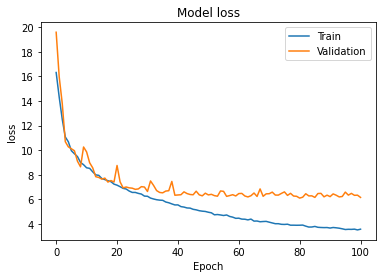

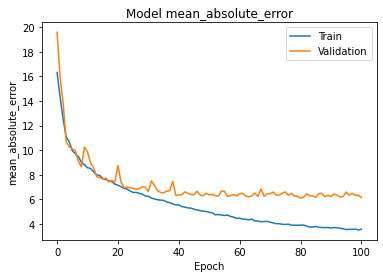

In [ ]:
print_metric("loss", history4)
print_metric("mean_absolute_error", history4)

In [ ]:
def build_model5(input_shape, learning_rate):

    inputs = Input(input_shape)

    conv1 = Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation="relu", name="Conv_1")(inputs)
    maxp1 = MaxPool2D(pool_size=(2,2), name="MaxPool_1")(conv1)
    drop1 = Dropout(0.1)(maxp1)

    conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_2")(drop1)
    maxp2 = MaxPool2D(pool_size=(2,2), name="MaxPool_2")(conv2)
    drop2 = Dropout(0.1)(maxp2)

    conv3 = Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_3")(drop2)
    maxp3 = MaxPool2D(pool_size=(2,2), name="MaxPool_3")(conv3)
    drop3 = Dropout(0.1)(maxp3)

    conv4 = Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu", name="Conv_4")(drop3)
    maxp4 = MaxPool2D(pool_size=(2,2), name="MaxPool_4")(conv4)
    drop4 = Dropout(0.1)(maxp4)

    flatten = Flatten(name="Flatten")(maxp4)
    dense2 = Dense(8, activation="relu", name="Sex_Dense")(flatten)
    drop6 = Dropout(0.1)(dense2)
    
    out2 = Dense(1, activation="sigmoid", name="Sex_output")(drop6)

    model = Model(inputs=[inputs], outputs=[out2], name="Model")

    # Adam 3e-4 ?
    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        loss=["binary_crossentropy"],
        optimizer=optimizer, 
        metrics=["binary_accuracy"])
    
    return model

model5 = build_model5(input_shape, 0.0003)
model5.summary()

Model: "Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 80, 80, 32)        2432      
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 40, 40, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 40, 40, 32)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 40, 40, 64)        18496     
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 20, 20, 64)        0     

In [ ]:
early_stop5 = EarlyStopping(
    monitor='val_loss', min_delta=0, patience=20, verbose=0,
    mode='min', baseline=None, restore_best_weights=True
)

history5 = model5.fit(X_train, Y_train[:, 1], batch_size=64, 
            validation_data=(X_validation, Y_validation[:, 1]), epochs=200,
            steps_per_epoch=len(X_train) / 64,
            callbacks=[early_stop5])

Epoch 1/200
277/277 [==============================] - 7s 21ms/step - loss: 0.6297 - binary_accuracy: 0.6362 - val_loss: 0.4189 - val_binary_accuracy: 0.8156
Epoch 2/200
277/277 [==============================] - 6s 21ms/step - loss: 0.4017 - binary_accuracy: 0.8064 - val_loss: 0.3273 - val_binary_accuracy: 0.8756
Epoch 3/200
277/277 [==============================] - 6s 21ms/step - loss: 0.3367 - binary_accuracy: 0.8494 - val_loss: 0.2895 - val_binary_accuracy: 0.8773
Epoch 4/200
277/277 [==============================] - 6s 21ms/step - loss: 0.3004 - binary_accuracy: 0.8643 - val_loss: 0.2624 - val_binary_accuracy: 0.8918
Epoch 5/200
277/277 [==============================] - 6s 21ms/step - loss: 0.2844 - binary_accuracy: 0.8715 - val_loss: 0.2532 - val_binary_accuracy: 0.9002
Epoch 6/200
277/277 [==============================] - 6s 20ms/step - loss: 0.2573 - binary_accuracy: 0.8907 - val_loss: 0.2490 - val_binary_accuracy: 0.8956
Epoch 7/200
277/277 [==============================]

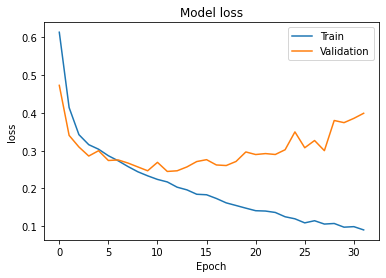

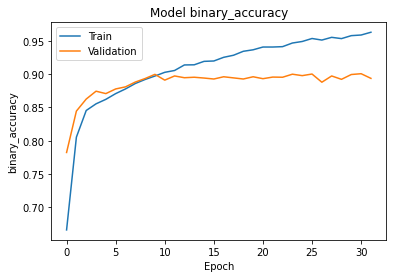

In [ ]:
print_metric("loss", history5)
print_metric("binary_accuracy", history5)

In [ ]:
def print_mse_age_byage(model, X, Y):
  mse_list = []
  ages = Y[:,0]
  values = np.unique(ages)
  for age in values:
    criterion = (ages == age)
    X_sub = X[criterion]
    Y_sub = ages[criterion]
    preds=model.predict(X_sub, batch_size=len(X_sub))[0]
    mse_list.append(mean_squared_error(Y_sub, preds))
  plt.plot(values, mse_list)
  plt.title("MSE of age predictions")
  plt.xlabel("Age")
  plt.ylabel("MSE")
  plt.show()

def print_accuracy_gender_byage(model, X, Y):
  accuracy_list = []
  ages = Y[:,0]
  genders = Y[:,1]
  values = np.unique(ages)
  for age in values:
    criterion = (ages == age)
    X_sub = X[criterion]
    Y_sub = genders[criterion]
    preds=model.predict(X_sub, batch_size=len(X_sub))[1]
    accuracy_list.append(accuracy_score(Y_sub, np.round(preds)))
  plt.plot(values, accuracy_list)
  plt.title("Accuracy on gender classification")
  plt.xlabel("Age")
  plt.ylabel("Accuracy")
  plt.show()

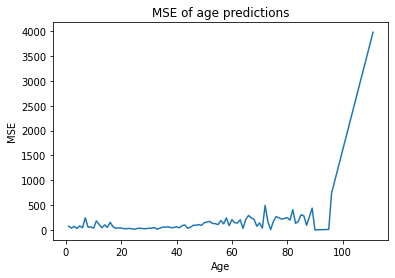

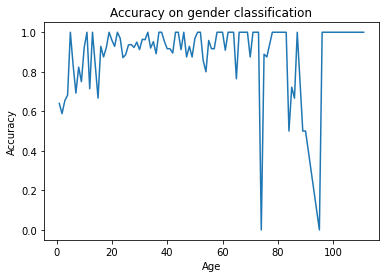

In [ ]:
print_mse_age_byage(model3, X_test, Y_test)
print_accuracy_gender_byage(model3, X_test, Y_test)

In [ ]:
def print_worst_prediction_age(model, X, Y):
  samples = 6
  accuracy_list = []
  ages = Y[:,0]
  preds = model.predict(X, batch_size=len(X))[0].flatten()
  diff = np.abs(ages - preds)
  indices = np.argsort(-diff)[:samples]

  plt.figure(figsize=(10,10))
  i = 0
  for i in range(samples):
    image = X[indices[i]]
    age_true = Y[indices[i]][0]
    age_pred = int(np.round(preds[indices[i]]))
    plt.subplot(2,3,i+1)
    plt.imshow(image)
    plt.title("Age prediction: %s\nAge expected: %s" % (age_pred, age_true))
    plt.axis('off')

  plt.show()

In [ ]:
model_recup = build_model3(input_shape, 0.0001, 0.1)
model_recup.load_weights('face-reader-model3.h5')

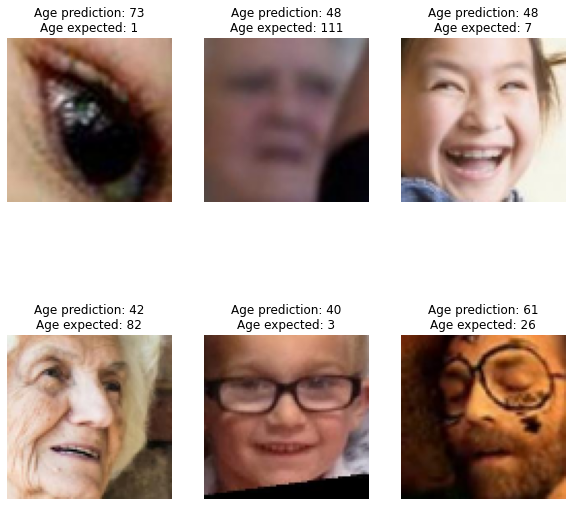

In [ ]:
print_worst_prediction_age(model3, X_test, Y_test)

In [ ]:
def print_random_6_samples(model, X, Y):
  plt.figure(figsize=(10,10))

  i = 0
  for i in range(6):
    index = random.randint(0, len(X))
    image = X[index]
    plt.subplot(2,3,i+1)
    plt.imshow(image)
    pred=model.predict(np.expand_dims(image, 0)) ##.flatten()
    truth = Y[index]
    sex_f=['Male','Female']   
    age_truth = int(np.round(truth[0]))
    sex_truth = int(np.round(truth[1]))
    age=int(np.round(pred[0][0]))   
    sex=int(np.round(pred[1][0]))
    plt.title("Gender prediction: %s\nGender expected: %s\n" % (sex_f[sex], sex_f[sex_truth]) + 
              "Age prediction: %s\nAge expected: %s" % (age, age_truth))
    plt.axis('off')

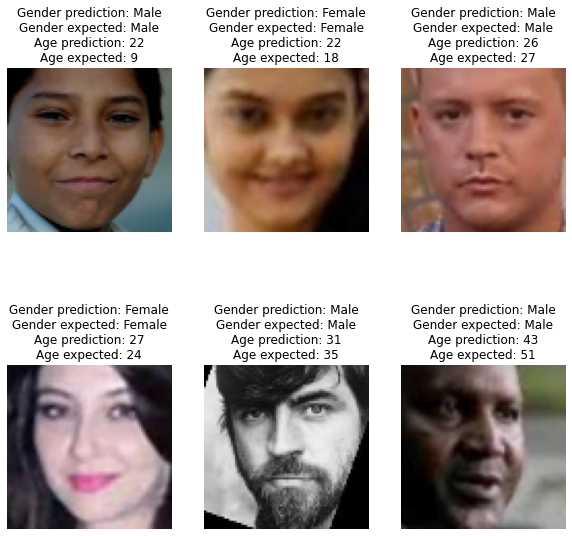

In [ ]:
print_random_6_samples(model3, X_test, Y_test)